<a href="https://colab.research.google.com/github/hyojuntak/Python/blob/main/Chipotle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import pandas as pd
file_path = 'chipotle.tsv'
chipo = pd.read_csv(file_path, sep='\t')
print(chipo.shape) #shape() 데이터의 행과 열의 크기
print("----------") #info() 행의 구성정보 열의 구성정보
print(chipo.info())
#object는 데이터 프레임에서 일반적으로 문자열을 의미한다
#null은 비어있음을 의미한다. 즉 결축값 
#4622 -3376 = 12476개의 결축지가 존재 
chipo.head(10) #chipo라는 dataframe에서 순서대로 10개의 row데이터를 보여준다
#order_id = 주문번호
#quantity = 주문수량
#item_name = 주문한 아이템의 이름
#choice_description = 주문한 아이템의 상세 선택 옵션
#item_price = 가격정보
#열, 피처의 형태,종류
#수치형 피처 (Numerical Feature)
#1)연속형 피처 : 어떤 구간안의 모든 값을 데이터로 가질 수 있다. 예) 키, 몸무게, 등등 
#2)비연속형 피처 : 셀수 있으며, 일정 구간 안에서 정해진 몇 개의 값만 가진다. 예)나이
#범주형 피처 (Categorical Feature)
#1)순서가 있는 범주형 피처  : 순서가 있으나 수치는 아니다.예) 학점 A B C
#2)순서가 없는 범주형 피처  : 데이터가 구분되면서도 순서는 없다. 예) 혈액형
#describe() 함수 : 요약 통계량 
chipo['order_id']=chipo['order_id'].astype(str) 
#order_id는 숫자의 의미를 가지지 않는다.
print(chipo.describe()) 
#chipo 데이터 프레임에서 수치형 피처들의 기초 통계량을 확인한다.
#mean 아이템의 평균 주문 수량 약 1.07 -> 대부분이 한 아이템에 대해 1개 정도만 주문했다.
#->한 사람이 같은 메뉴를 여러개 구매하는 경우는 많지 않다. -> 혼자와서 구매하는 경우가 많다.




(4622, 5)
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None
          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


# 새 섹션

In [121]:
#unique() 함수로 범주형 피처의 개수 
#두가지 피처는 범주형이기 때문에 unique()함수를 사용 
print(len(chipo['order_id'].unique())) #order_id 개수를 출력
print(len(chipo['item_name'].unique())) #item_name 개수를 출력 


1834
50


In [122]:
#==========================================================================
#<Step 2 인사이트의 발견> 
#가장 많이 주문한 제품은 무엇일까? 
#DataFrame['column]형태에 value_counts()를 적용해서 분석 
item_count = chipo['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count.iteritems(),1):
  print('Top',idx,'',val,cnt)






# 제품당 주문한 양은 얼마인가
chipo['item_name'].value_counts().index.tolist()[0]

Top 1  Chicken Bowl 726
Top 2  Chicken Burrito 553
Top 3  Chips and Guacamole 479
Top 4  Steak Burrito 368
Top 5  Canned Soft Drink 301
Top 6  Chips 211
Top 7  Steak Bowl 211
Top 8  Bottled Water 162
Top 9  Chicken Soft Tacos 115
Top 10  Chips and Fresh Tomato Salsa 110


'Chicken Bowl'

In [123]:
# 아이템별 주문 개수와 총량 
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

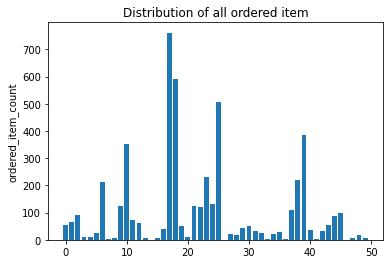

In [111]:
#간단한 시각화
#시각화를 하면 숫자와 문자로만 되어있는 데이터에서는 보이지 않던 정보를 발견할수도 있다.
%matplotlib inline 
#브라우저에서 결과 그림을 바로 볼수 있게 설정 
import numpy as np 
import matplotlib.pyplot as plt
item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()
plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all ordered item')
plt.show()

In [124]:
#=====================================================================================
#<Step 3 데이터 전처리>
#apply lamda 함수를 이용한 데이터 전처리 
#item_price가 문자열이기 때문에 ($) 요약 통계를 구할 수 있다.
print(chipo.info())
print('-------------------------------------------------')
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
-------------------------------------------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [113]:
# $ 기호 제거 
#chipo['item_price'] = chipo['item_price'].apply(lamda e: float(e[1:]))
#chipo.describe()

In [125]:
chipo['item_price'].head()

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [115]:
#=====================================================================================
#<Step 4 탐색적 분석>
#마치 데이터와 스무고개 놀이와 비슷하다. 조금씩 복잡한 질문들로 데이터 분석 
#주문당 평균 금액 출력
#한 주문에 10달러 이상 사용한 주문들의 Id를 출력 
#각 아이템의 가격은
#가장 비싼 주문에서 Item이 몇개 팔렸는지 
#주문당 평균 금액
chipo.groupby('order_id')['item_price'].sum()
chipo.groupby('order_id')['item_price'].sum().describe()[:10]



count             1834
unique             642
top       $8.75 $4.45 
freq                61
Name: item_price, dtype: object

In [116]:
chipo.groupby('order_id')['item_price'].sum().describe()[:10]


count             1834
unique             642
top       $8.75 $4.45 
freq                61
Name: item_price, dtype: object

In [135]:
chipo_orderid_group = chipo.groupby('order_id').sum() 
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10] 
print(results[:10]) 
print(results.index.values)

AttributeError: ignored

In [ ]:
#각 아이템의 가격을 구하기
#동일 아이템을 1개 구매한 주문만 선별
#item_name을 기준으로 group_by연산 수행하고 min()함수로 각 그룹별 최저가를 계산
#item_price를 기준으로 정렬 sort_values()함수(series 데이터를 정렬)사용

chipo_one_item = chipo[chipo.quantity==1]
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by='item_price',ascending=False)[:18]




In [ ]:
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()
plt.bar(x_pos, item_price, align='center')
plt.hist(item_price)
plt.show()


In [ ]:
#가장 비싼 주문에서 item이 총 몇개 팔렸는지? 
chipo.groupby('order_id').sum().sort_values(by='item_price',ascending=False)[:5]

In [131]:
chipo_salad = chipo[chipo['item_name']=='Veggie Salad Bowl']
print(len(chipo_salad))
chipo_salad.head(5)

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",$11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [134]:
chipo_chicken = chipo[chipo['item_name']=='Chicken Bowl']
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity']
chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum>=2]
print(chipo_chicken_result)
print(chipo_chicken)

order_id
1004    2
1023    2
1072    2
1078    2
1091    2
       ..
972     2
973     3
983     2
986     2
997     2
Name: quantity, Length: 114, dtype: int64
     order_id  ...  item_price
4           2  ...     $16.98 
5           3  ...     $10.98 
13          7  ...     $11.25 
19         10  ...      $8.75 
26         13  ...      $8.49 
...       ...  ...         ...
4590     1825  ...     $11.25 
4591     1825  ...      $8.75 
4595     1826  ...      $8.75 
4599     1827  ...      $8.75 
4604     1828  ...      $8.75 

[726 rows x 5 columns]


In [139]:
#============================================================================
#step 1 탐색 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
drinks = pd.read_csv('drinks.csv')
print(drinks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


In [143]:
drinks.head(5)
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [149]:
#===========================================================================================
#step 2 인사이트의 발견 
#피쳐간의 상관관계 탐색(ex. 키와 몸무게의 관계...)
#상관계수 구하기 
#bear_servings , wine_servings 의 상관계수를 구해보자
#pearson은 상관계수를 구하는 계산 방법 중 하나이며 가장 널리 쓰이는 방법이다

corr = drinks[['beer_servings','wine_servings']].corr(method='pearson')
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [150]:
#상관 분석
#상관 분석이란 두 변수 간의 선형적 관계를 상관계수로 표현하는 것이다
#상관 계수를 구한다는 것은 공분산의 개념을 포함한다
#공분산은 2개의 확률 변수에 대한 상관 정도로 2개의 변수 중 하나의 값이 상승하는 경향을 보일 때 
#다른 값도 상승하는 경향을 수치로 나타낸 것이다
#공분산만으로 두 확률 변수의 상관 관계를 구하게 되면 두변수의 단위 크기에 따라 영향을 받을 수 밖에 없다
#따라서 -1에서 1사이의 값으로 바꾸어 표현한 것을 상관 계수라고 한다


In [156]:
cols = ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method='pearson')
print(corr)

                              beer_servings  ...  total_litres_of_pure_alcohol
beer_servings                      1.000000  ...                      0.835839
spirit_servings                    0.458819  ...                      0.654968
wine_servings                      0.527172  ...                      0.667598
total_litres_of_pure_alcohol       0.835839  ...                      1.000000

[4 rows x 4 columns]


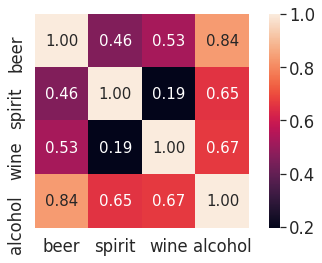

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_view = ['beer', 'spirit', 'wine', 'alcohol'] # 그래프 출력을 위한 cols 이름을 축약합니다.

sns.set(font_scale=1.5)

hm = sns.heatmap(corr.values,

            cbar=True,

            annot=True, 

            square=True,

            fmt='.2f',

            annot_kws={'size': 15},

            yticklabels=cols_view,

            xticklabels=cols_view)

 

plt.tight_layout()

plt.show()